<a href="https://colab.research.google.com/github/mrcruz117/EDA_Template/blob/main/EDA_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries, directory and data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Time\ Series\ Forecasting\ Product

/content/drive/MyDrive/Time Series Forecasting Product


In [6]:
# libraries
import numpy as np
import pandas as pd
from  statsmodels.tsa.seasonal import seasonal_decompose
from  statsmodels.graphics.tsaplots import month_plot, quarter_plot


In [7]:
# load data
# YYYY-MM-DD
# important that dates are in a consistent format
df = pd.read_csv('nyc_data.csv', index_col=0, parse_dates=True)
df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [8]:
# rename demand
df = df.rename(columns={'Demand': 'y'})
df.head(0)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,


## Data Analysis

In [9]:
# Summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,2192.0,756.059227,152.143070,425.77532,641.161123,736.94763,855.645886,1384.908525
Easter,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Thanksgiving,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Christmas,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Temperature,2192.0,15.012655,8.772751,-8.85000,7.767500,14.89500,23.230000,30.900000
Marketing,2192.0,126.675890,58.274047,24.58900,78.303500,122.76450,169.395250,299.860000


## Seasonal Decomposition

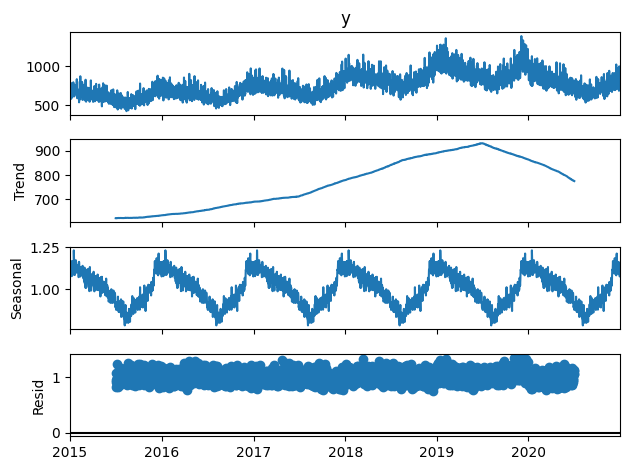

In [10]:
# decomposition
decomposition = seasonal_decompose(
    x = df.y,
    model= 'multiplicative',
    period=365
)
# for some reason, ; removes duped plots
decomposition.plot();

<Axes: xlabel='Date'>

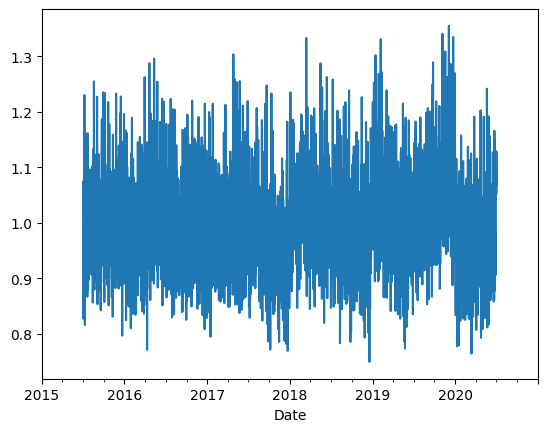

In [11]:
# plotting
decomposition.resid.plot()

<ipython-input-14-d873d3397044>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_resample = df.y.resample(rule='Q').mean()


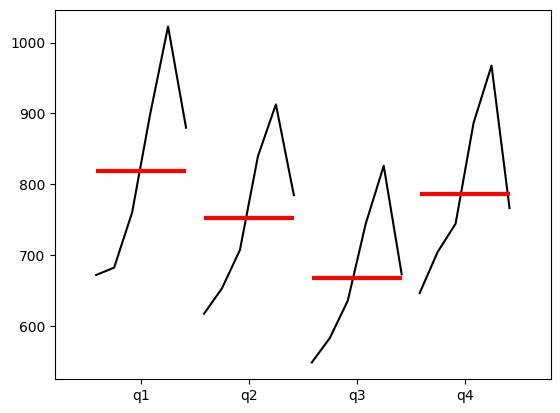

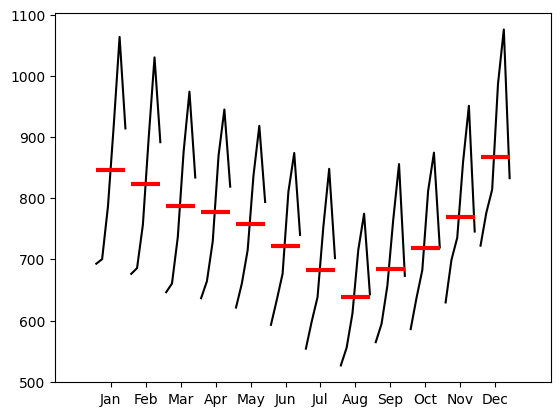

In [14]:
# Seasonal graphs

# we want monthly data, but currently have daily data.
# Aggregating by timeframe. can also do daily, weekly etc.
quarter_resample = df.y.resample(rule='Q').mean()
month_start_resample = df.y.resample(rule='MS').mean()
quarter_plot(quarter_resample);
month_plot(month_start_resample);